In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import svm
import pickle

In [2]:
#Load the dataset after bidirectional elimination variable selection

x = pd.read_csv("bi_variable_selection.csv")
y = pd.read_csv("bi_variable_labels.csv")

#Splits the dataset into 70 percent training set and 30 percent testing set
# keeping the random_state value same makes the function to split same rows into training and testing every time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=30)

In [3]:
from datetime import timedelta
import time
#Time returns the elapsed time in seconds. This function converts that into hours, minutes and seconds
def convert_to_preferred_format(sec):
   sec = sec % (24 * 3600)
   hour = sec // 3600
   sec %= 3600
   min = sec // 60
   sec %= 60
   return "%02d:%02d:%02d" % (hour, min, sec) 
start = time.time()

#Initializes the default SVM
normal_model = svm.SVR()

#Trains the SVM on the training set
normal_model.fit(x_train, y_train.values.ravel())

#Performes predictions on the test set using trained SVM
normal_predictions = normal_model.predict(x_test)
k=len(list(x_train.columns))
n = len(normal_predictions)
stop = (time.time() - start)


#Calculates and prints the time taken for training the SVM
print('Elapsed Time:', convert_to_preferred_format(stop))
print('======'*5)
print("SVM")
print('======'*5)

#Evaluation metrics for theSVM on test set
Metrics={}
Metrics['MSE']=[mean_squared_error(y_test,normal_predictions)]
Metrics['RMSE']=[np.sqrt(mean_squared_error(y_test,normal_predictions))]
Metrics['R2_Score']=[r2_score(y_test,normal_predictions)]
Metrics['Adjusted_R2_score']=[1 - ((1-r2_score(y_test,normal_predictions))*(n-1)/(n-k-1))]
metrics_df = pd.DataFrame(Metrics)
print(metrics_df)
filename = 'svm_bi_variable_model.sav'
pickle.dump(normal_model, open(filename, 'wb'))

Elapsed Time: 00:04:10
SVM
        MSE      RMSE  R2_Score  Adjusted_R2_score
0  0.120061  0.346498   0.87066           0.870601


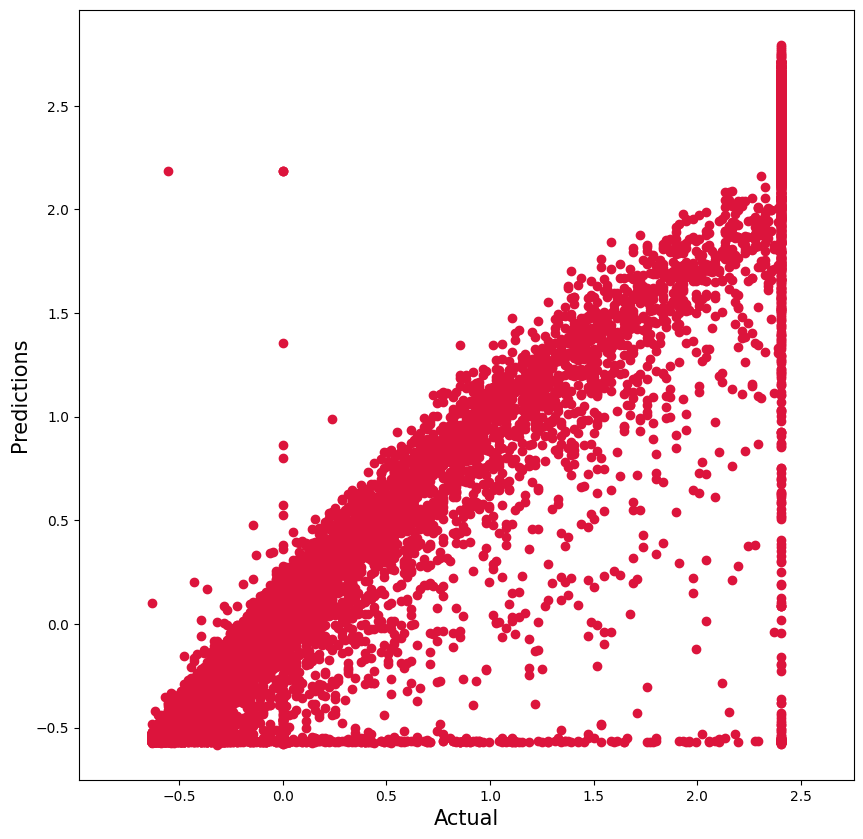

In [4]:
#Plot of actual values versus the predicted values from SVM
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, normal_predictions, c='crimson')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
#Time returns the elapsed time in seconds. This function converts that into hours, minutes and seconds
def convert_to_preferred_format(sec):
   sec = sec % (24 * 3600)
   hour = sec // 3600
   sec %= 3600
   min = sec // 60
   sec %= 60
   return "%02d:%02d:%02d" % (hour, min, sec) 
start = time.time()

#Initializing parameters for doing grid search cv and finding the best hyperparameters
#C specifies the regularization parameter
#gamma specifies the Kernel coefficient
#Kernel specifies kernel to use.
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV

#Initialize grid search cv for the SVM by specifying that it should evaluate different models
#using negative mean squared error, cv is used to specify the n-fold cross validation which here is 3
model= GridSearchCV(normal_model, parameters, scoring = 'neg_mean_squared_error', n_jobs=-1, cv = 3)
model.fit(x_train, y_train.values.ravel())

#Print the best parameters of the model found by grid search cv
print("Best Parameters Found",model.best_params_)


#Performes predictions on the test set using best found SVM
tuned_pred = model.predict(x_test)
k=len(list(x_train.columns))
n = len(tuned_pred)
stop = (time.time() - start)

#Calculates and prints the time taken for training best found SVM
print('Elapsed Time:', convert_to_preferred_format(stop))
print('======'*5)
print("After GridSearchCV")
print('======'*5)

#Evaluation metrics for the optimized SVM on test set
Metrics={}
Metrics['MSE']=[mean_squared_error(y_test,tuned_pred)]
Metrics['RMSE']=[np.sqrt(mean_squared_error(y_test,tuned_pred))]
Metrics['R2_Score']=[r2_score(y_test,tuned_pred)]
Metrics['Adjusted_R2_score']=[1 - ((1-r2_score(y_test,tuned_pred))*(n-1)/(n-k-1))]
metrics_df = pd.DataFrame(Metrics)
print(metrics_df)

#Saves the model so that it can be used for test results comparison
filename = 'svm_variable_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#Plot of actual values versus the predicted values from optimized SVM
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, tuned_pred, c='crimson')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()